# Projekt 1 - Analiza danych pogodowych
### Autorzy:
**Agata Biernacka**
**Kacper Kilianek**
**Ewelina Trybułowska**

In [246]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from scipy import stats

In [247]:
data = pd.read_csv("weatherHistory.csv")
data.drop(['Summary', 'Precip Type', 'Daily Summary'], axis=1, inplace=True)

# Przygotowanie danych
data['Formatted Date'] = pd.to_datetime(data['Formatted Date'], utc=True)
data['Month'] = data['Formatted Date'].dt.month

In [248]:
data.head(5)

,Formatted Date,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars),Month
0,2006-03-31 22:00:00+00:00,9.472222,7.388889,0.89,14.1197,251.0,15.8263,0.0,1015.13,3
1,2006-03-31 23:00:00+00:00,9.355556,7.227778,0.86,14.2646,259.0,15.8263,0.0,1015.63,3
2,2006-04-01 00:00:00+00:00,9.377778,9.377778,0.89,3.9284,204.0,14.9569,0.0,1015.94,4
3,2006-04-01 01:00:00+00:00,8.288889,5.944444,0.83,14.1036,269.0,15.8263,0.0,1016.41,4
4,2006-04-01 02:00:00+00:00,8.755556,6.977778,0.83,11.0446,259.0,15.8263,0.0,1016.51,4


In [249]:
# Podstawowe informacje statystyczne
data.describe()

,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars),Month
count,96453.000000,96453.000000,96453.000000,96453.000000,96453.000000,96453.000000,96453.0,96453.000000,96453.000000
mean,11.932678,10.855029,0.734899,10.810640,187.509232,10.347325,0.0,1003.235956,6.523001
std,9.551546,10.696847,0.195473,6.913571,107.383428,4.192123,0.0,116.969906,3.448501
min,-21.822222,-27.716667,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,1.000000
25%,4.688889,2.311111,0.600000,5.828200,116.000000,8.339800,0.0,1011.900000,4.000000
50%,12.000000,12.000000,0.780000,9.965900,180.000000,10.046400,0.0,1016.450000,7.000000
75%,18.838889,18.838889,0.890000,14.135800,290.000000,14.812000,0.0,1021.090000,10.000000
max,39.905556,39.344444,1.000000,63.852600,359.000000,16.100000,0.0,1046.380000,12.000000


### Przykładowe wykresy czasowe danych

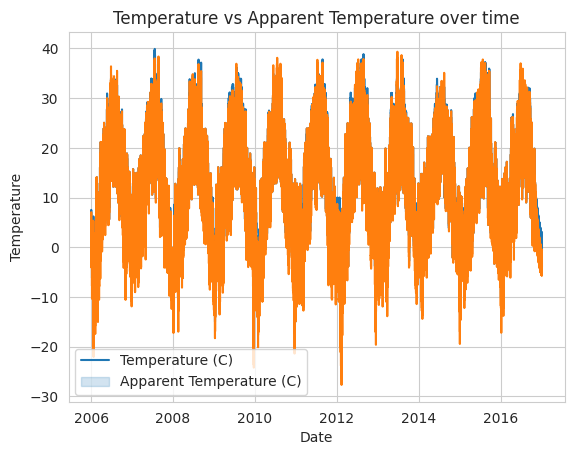

In [250]:
# Wykres czasowy - przykładowy dla kolumn 'Temperature (C)' i 'Apparent Temperature (C)'
sns.lineplot(data=data, x='Formatted Date', y='Temperature (C)')
sns.lineplot(data=data, x='Formatted Date', y='Apparent Temperature (C)')
plt.xlabel('Date')
plt.ylabel('Temperature')
plt.title('Temperature vs Apparent Temperature over time')
plt.legend(['Temperature (C)', 'Apparent Temperature (C)'])
plt.show()

# INTERAKTYWNE WYKRESY CZASOWE

## TESTY STATYSTYCZNE I ICH WIZUALIZACJA

#### 1.WIZUALIZACJA T-STUDENT

Kod wykonuje test t-Studenta, porównując średnie wartości dla każdej kolumny w pierwszej i drugiej połowie danych. Wynikowy wykres heatmap przedstawia statystyki t i wartości p dla każdej kolumny, co pozwala na szybkie porównanie wyników testów t-Studenta między różnymi atrybutami danych pogodowych.

Odrzucamy H0 dla kolumny Temperature (C). Średnia wartość w pierwszej połowie danych jest różna od średniej wartości w drugiej połowie.
Odrzucamy H0 dla kolumny Apparent Temperature (C). Średnia wartość w pierwszej połowie danych jest różna od średniej wartości w drugiej połowie.
Nie ma podstaw do odrzucenia H0 dla kolumny Humidity. Średnia wartość w pierwszej połowie danych jest równa średniej wartości w drugiej połowie danych.
Odrzucamy H0 dla kolumny Wind Speed (km/h). Średnia wartość w pierwszej połowie danych jest różna od średniej wartości w drugiej połowie.
Odrzucamy H0 dla kolumny Wind Bearing (degrees). Średnia wartość w pierwszej połowie danych jest różna od średniej wartości w drugiej połowie.
Odrzucamy H0 dla kolumny Visibility (km). Średnia wartość w pierwszej połowie danych jest różna od średniej wartości w drugiej połowie.
Nie ma podstaw do odrzucenia H0 dla kolumny Pressure (millibars). Średnia wartość w pierwszej połowie danych jest równa średniej wartości w drugiej po

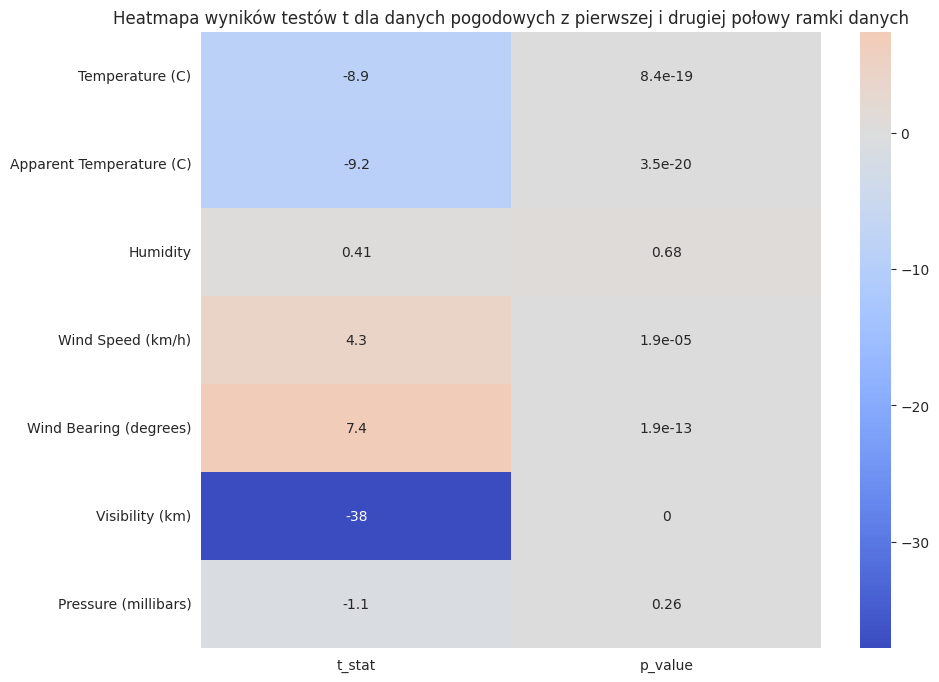

In [251]:
COLUMNS_TO_TEST = ['Temperature (C)', 'Apparent Temperature (C)', 'Humidity',
                   'Wind Speed (km/h)', 'Wind Bearing (degrees)', 'Visibility (km)',
                   'Pressure (millibars)']

# Podziel dane na dwie połowy
first_half = data[:len(data) // 2]
second_half = data[len(data) // 2:]

# Obliczanie statystyk t i wartości p dla każdej kolumny używając list comprehension
t_values = [stats.ttest_ind(first_half[column], second_half[column]) for column in
            COLUMNS_TO_TEST]
t_stats, t_p_values = zip(*t_values)

# Wyświetlanie wyników
for column, p in zip(COLUMNS_TO_TEST, t_p_values):
    if p < 0.05:
        print(
            f"Odrzucamy H0 dla kolumny {column}. Średnia wartość w pierwszej połowie danych jest różna od średniej wartości w drugiej połowie.")
    else:
        print(
            f"Nie ma podstaw do odrzucenia H0 dla kolumny {column}. Średnia wartość w pierwszej połowie danych jest równa średniej wartości w drugiej połowie danych.")

# Tworzenie ramki danych z wynikami testów t
t_df = pd.DataFrame(np.zeros((len(COLUMNS_TO_TEST), 2)), columns=['t_stat', 'p_value'],
                    index=COLUMNS_TO_TEST)
t_df['t_stat'] = t_stats
t_df['p_value'] = t_p_values

# Rysowanie heatmapy
plt.figure(figsize=(10, 8))
sns.heatmap(t_df, annot=True, cmap="coolwarm", center=0)
plt.title(
    'Heatmapa wyników testów t dla danych pogodowych z pierwszej i drugiej połowy ramki danych')
plt.show()

Wynikowy wykres heatmap przedstawia statystyki t (pierwsza kolumna) i wartości p (druga kolumna) dla każdej z kolumn danych pogodowych. Te wyniki pochodzą z testów t-Studenta, które porównują średnie wartości dla każdej kolumny w pierwszej i drugiej połowie danych.


Interpretacja wyników jest następująca:

Statystyka t -- Wartość t-Stat dla każdej kolumny mierzy różnicę między średnimi wartościami w pierwszej i drugiej połowie danych, wyrażoną jako liczba odchylenia standardowego. Wartość dodatnia t-Stat wskazuje, że średnia wartość w pierwszej połowie danych jest większa niż w drugiej połowie, podczas gdy wartość ujemna t-Stat sugeruje, że średnia wartość w drugiej połowie danych jest większa niż w pierwszej połowie.


Wartość p-- Wartość p dla każdej kolumny mierzy prawdopodobieństwo, że obserwowana różnica między średnimi wartościami w obu połowach danych wystąpiłaby przypadkowo, gdyby nie było żadnej rzeczywistej różnicy między nimi. Jeśli wartość p jest mniejsza niż ustalony próg istotności (np. 0,05), odrzucamy hipotezę zerową, że średnie wartości w obu połowach danych są takie same, na rzecz hipotezy alternatywnej, że istnieje istotna różnica między nimi.

Analizując wyniki na heatmapie, można zauważyć, że dla niektórych kolumn (np. "Temperature (C)", "Apparent Temperature (C)" i "Wind Bearing (degrees)"), wartości p są mniejsze niż 0,05, co sugeruje, że istnieje istotna różnica między średnimi wartościami tych kolumn w pierwszej i drugiej połowie danych. Dla innych kolumn, wartości p są większe niż 0,05, co wskazuje, że nie można odrzucić hipotezy zerowej, że średnie wartości w obu połowach danych są takie same.

### Szczegółowa analiza wyniku testu t-Studenta
- Temperature (C): Istotne różnice między dwoma połówkami danych. T-scores na poziomie -8.856634 oraz p-value zdecydowanie poniżej 0.05 (8.382575e-19) pozwalają odrzucić hipotezę zerową, co sugeruje, że średnie temperatury w dwóch połówkach danych są różne.
- Apparent Temperature (C): Również tutaj występują istotne różnice między dwoma połówkami danych. T-scores na poziomie -9.205305 i p-value (3.472512e-20) poniżej 0.05 oznaczają, że można odrzucić hipotezę zerową, sugerując, że średnia odczuwalna temperatura w dwóch połówkach danych różni się.
- Humidity: T-score wynosi 0.410241, a p-value wynosi 0.6816302, co jest większe niż 0.05. To sugeruje, że nie ma podstaw do odrzucenia hipotezy o równości średnich wilgotności w dwóch połówkach danych.
- Wind Speed (km/h): Istotne różnice z t-scores o wartości 4.275809 i p-value (1.906268e-05) poniżej 0.05. Pozwala to odrzucić hipotezę zerową i sugeruje, że istnieje różnica między średnimi prędkościami wiatru w dwóch połówkach danych.
- Wind Bearing (degrees): Istotne różnice z t-scores o wartości 7.359026 i p-value (1.867225e-13) poniżej 0.05. Pozwala to odrzucić hipotezę zerową i sugeruje, że istnieje różnica między średnimi kierunkami wiatru w dwóch połówkach danych.
- Visibility (km): Bardzo istotne różnice z t-scores wynoszącym -37.797437 i p-value na poziomie 0. Pozwala to odrzucić hipotezę zerową i sugeruje, że istnieje duża różnica między średnimi widocznościami w dwóch połówkach danych.
- Pressure (millibars): T-score wynosi -1.127315, a p-value wynosi 0.2596121, co jest większe niż 0.05. To sugeruje, że nie ma podstaw do odrzucenia hipotezy o równości średniego ciśnienia w dwóch połówkach danych.

Podsumowując, wyniki sugerują, że istnieją istotne statystycznie różnice między dwoma połówkami danych dla kolumn Temperatura, Widoczność, Prędkość wiatru, Kierunek wiatru i Odczuwalna temperatura. Wilgotność i Ciśnienie nie wykazały istotnych różnic.

##### 1.1 WIZUALIZACJA T-STUDENTA - porównanie średnich pomiędzy miesiącami letnimi a zimowymi
Porównanie średnich pomiędzy wartościami miesięcy letnich a zimowych - kod pozwala na porównanie warunków pogodowych w zimie i lecie. Analizując wyniki testu t-Studenta, można ocenić, czy różnice między zimą a latem są istotne statystycznie dla tych kolumn.

In [252]:
COLUMNS_TO_TEST = ['Temperature (C)', 'Apparent Temperature (C)', 'Humidity',
                   'Wind Speed (km/h)', 'Wind Bearing (degrees)', 'Visibility (km)',
                   'Pressure (millibars)']

winter_data = data[data['Month'].isin([12, 1, 2])]
summer_data = data[data['Month'].isin([6, 7, 8])]

# Calculate t-statistics and p-values  
t_stats = []
t_p_values = []

for column in COLUMNS_TO_TEST:
    t_stat, t_p_value = stats.ttest_ind(winter_data[column], summer_data[column],
                                        equal_var=False)  # poprawka tutaj
    t_stats.append(t_stat)
    t_p_values.append(t_p_value)
    if t_p_value < 0.05:
        print(
            f"Odrzucamy H0 dla kolumny {column}. Średnia wartość w miesiącach zimowych jest różna od średniej wartości w miesiącach letnicj.")
    else:
        print(
            f"Nie ma podstaw do odrzucenia H0 dla kolumny {column}. Średnia wartość w miesiącach zimowych jest równa średniej wartości w miesiącach letnich")

# Create a DataFrame with t-statistics and p-values  
df = pd.DataFrame(index=COLUMNS_TO_TEST, columns=['t_stat', 'p_value'])
df['t_stat'] = t_stats
df['p_value'] = t_p_values

Odrzucamy H0 dla kolumny Temperature (C). Średnia wartość w miesiącach zimowych jest różna od średniej wartości w miesiącach letnicj.
Odrzucamy H0 dla kolumny Apparent Temperature (C). Średnia wartość w miesiącach zimowych jest różna od średniej wartości w miesiącach letnicj.
Odrzucamy H0 dla kolumny Humidity. Średnia wartość w miesiącach zimowych jest różna od średniej wartości w miesiącach letnicj.
Odrzucamy H0 dla kolumny Wind Speed (km/h). Średnia wartość w miesiącach zimowych jest różna od średniej wartości w miesiącach letnicj.
Odrzucamy H0 dla kolumny Wind Bearing (degrees). Średnia wartość w miesiącach zimowych jest różna od średniej wartości w miesiącach letnicj.
Odrzucamy H0 dla kolumny Visibility (km). Średnia wartość w miesiącach zimowych jest różna od średniej wartości w miesiącach letnicj.
Odrzucamy H0 dla kolumny Pressure (millibars). Średnia wartość w miesiącach zimowych jest różna od średniej wartości w miesiącach letnicj.


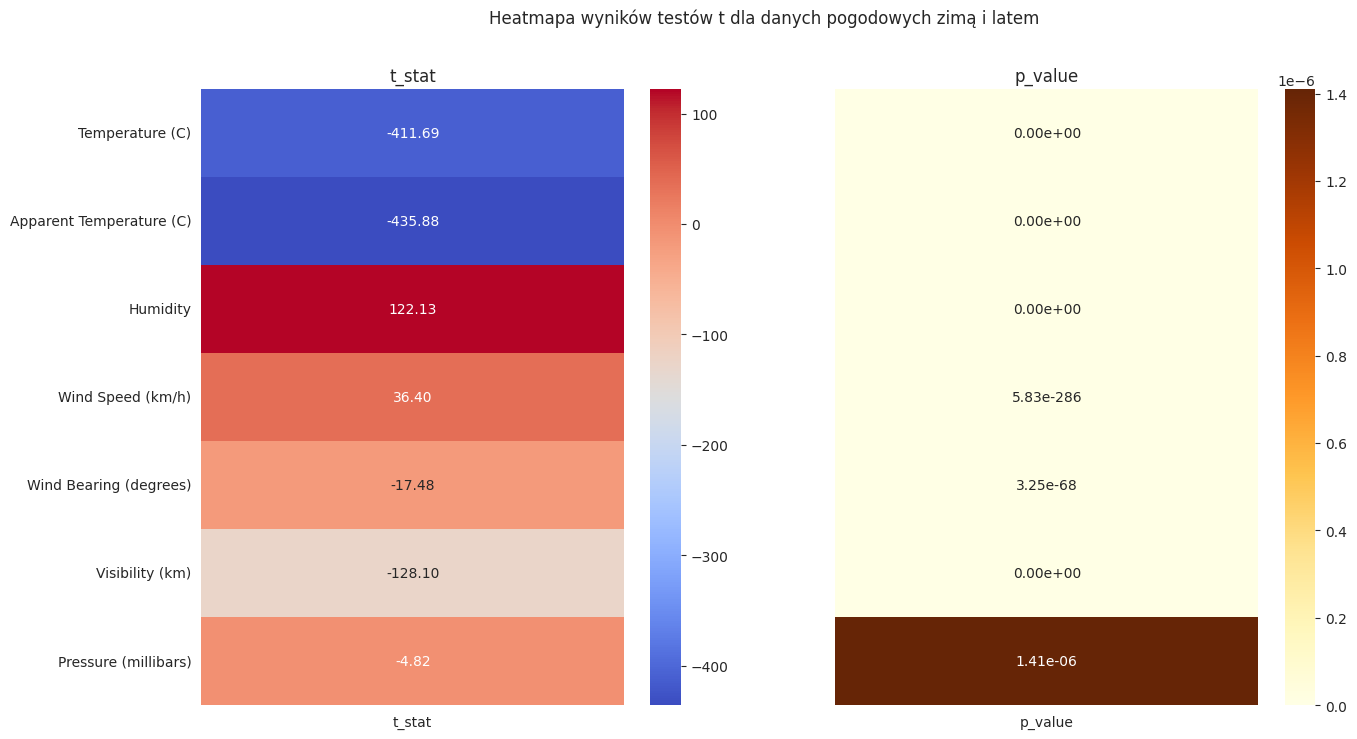

<Figure size 1000x800 with 0 Axes>

In [253]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 8), sharey=True)

sns.heatmap(data=df[['t_stat']], annot=True, fmt='.2f', cmap='coolwarm', cbar=True,
            ax=ax1)
ax1.set_title('t_stat')

sns.heatmap(data=df[['p_value']], annot=True, fmt='.2e', cmap='YlOrBr', cbar=True,
            ax=ax2)
ax2.set_title('p_value')

plt.figure(figsize=(10, 8))
fig.suptitle('Heatmapa wyników testów t dla danych pogodowych zimą i latem')
plt.tight_layout()
plt.show()

- Statystyki t (pierwsza kolumna): Kolor niebieski wskazuje na ujemne wartości t, co oznacza, że średnia wartość dla zimy jest niższa niż dla lata. Kolor czerwony oznacza dodatnie wartości t, co wskazuje, że średnia wartość dla zimy jest wyższa niż dla lata. Im ciemniejszy kolor, tym większa różnica między średnimi.

- Wartości p (druga kolumna): Wartości p mniejsze niż 0,05 sugerują, że różnice między warunkami pogodowymi w zimie a latem są istotne statystycznie dla danej kolumny.




In [254]:
df_mean = df.copy()

#### 2.WIZUALIZACJA - TEST BARTLETTA/LEVENA

Kod przeprowadza test na równość wariancji (homoskedastyczność) dla danych pogodowych z sezonu letniego i zimowego. Głównym celem takiego testu jest sprawdzenie, czy obie grupy danych mają równą wariancję. 

In [255]:

# Define constants
ALPHA = 0.05


def check_and_test_distribution(summer_data_subset, winter_data_subset, column):
    # Check if data is normally distributed, if yes use Bartlett's test, else use Levene's test
    summer_normal = stats.shapiro(summer_data_subset)[1] > ALPHA
    winter_normal = stats.shapiro(winter_data_subset)[1] > ALPHA

    if summer_normal and winter_normal:
        # Bartlett's test
        test_name = 'Bartlett'
    else:
        # Levene's test
        test_name = 'Levene'

    stat, p_value = stats.bartlett(summer_data_subset,
                                   winter_data_subset) if test_name == 'Bartlett' else \
        stats.levene(summer_data_subset, winter_data_subset)

    return column, test_name, stat, p_value


# Define seasons datasets
winter_data = data[data['Month'].isin([12, 1, 2])]
summer_data = data[data['Month'].isin([6, 7, 8])]

t_stats = {}
t_p_values = {}
used_tests = {}

# Perform tests
for column in COLUMNS_TO_TEST:
    # Check and test the distribution
    column, test_name, stat, p_value = \
        check_and_test_distribution(summer_data[column], winter_data[column], column)

    t_stats[column] = stat
    t_p_values[column] = p_value
    used_tests[column] = test_name

    # Print result
    result = 'Odrzucamy' if p_value < ALPHA else 'Nie ma podstaw do odrzucenia'
    print(f"{result} H0 dla kolumny {column} używając testu {test_name}.")

# Create a DataFrame with t-statistics and p-values  
df = pd.DataFrame(index=COLUMNS_TO_TEST, columns=['t_stat', 'p_value', 'used_test'])
df['t_stat'] = t_stats
df['p_value'] = t_p_values
df['used_test'] = used_tests



Odrzucamy H0 dla kolumny Temperature (C) używając testu Levene.
Odrzucamy H0 dla kolumny Apparent Temperature (C) używając testu Levene.
Odrzucamy H0 dla kolumny Humidity używając testu Levene.
Odrzucamy H0 dla kolumny Wind Speed (km/h) używając testu Levene.
Odrzucamy H0 dla kolumny Wind Bearing (degrees) używając testu Levene.
Odrzucamy H0 dla kolumny Visibility (km) używając testu Levene.
Odrzucamy H0 dla kolumny Pressure (millibars) używając testu Levene.


/home/kacper/PycharmProjects/ZMWD-projekt-1/venv/lib/python3.11/site-packages/scipy/stats/_morestats.py:1882: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


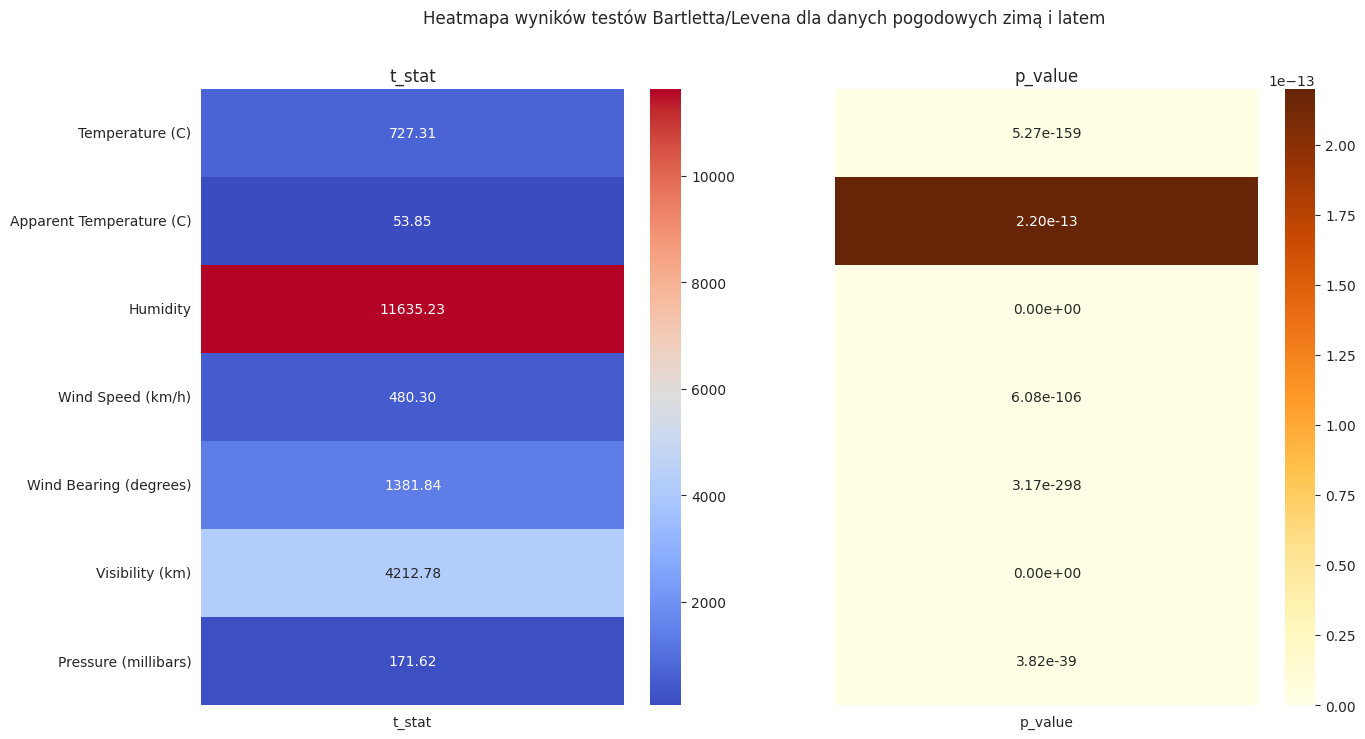

<Figure size 1000x800 with 0 Axes>

In [256]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 8), sharey=True)

# Wykres punktowy dla t_stat
sns.heatmap(data=df[['t_stat']], annot=True, fmt='.2f', cmap='coolwarm', cbar=True,
            ax=ax1)
ax1.set_title('t_stat')

# Wykres punktowy dla p_value
sns.heatmap(data=df[['p_value']], annot=True, fmt='.2e', cmap='YlOrBr', cbar=True,
            ax=ax2)
ax2.set_title('p_value')

plt.figure(figsize=(10, 8))
fig.suptitle(
    'Heatmapa wyników testów Bartletta/Levena dla danych pogodowych zimą i latem')
plt.tight_layout()
plt.show()



In [257]:
df_var = df.copy()

Interpretacja mapy ciepła:
- Statystyki testowe (pierwsza kolumna): Im większa wartość statystyki testowej, tym większa różnica między wariancjami, co prowadzi do mniejszej wartości p.
- p (druga kolumna): Jeśli wartość p < alpha (0,05), odrzucamy hipotezę zerową (H0: wariancja danych letnich = wariancja danych zimowych) i przyjmujemy hipotezę alternatywną (H1: wariancja danych letnich ≠ wariancja danych zimowych). Oznacza to, że różnice między wariancjami są istotne statystycznie.

### Szczegółowa analiza wyników testów Bartletta/Levena
Dla wszystkich podanych cech (Temperature, Apparent Temperature, Humidity, Wind Speed, Wind Bearing, Visibility, Pressure), p-wartości są znacznie niższe niż 0.05. Dlatego odrzucamy hipotezę zerową dla wszystkich cech i dochodzimy do wniosku, że istnieją dowody na różnicę zmienności między grupami dla wszystkich tych cech.
Dla Humidity i Visibility, p-wartości wynoszą zero. Wskazuje to na bardzo silne dowody przeciwko hipotezie zerowej.

#### 3.WIZUALIZACJA  - porównanie jednocześnie średnich i wariancji pomiędzy miesiącami letnimi a zimowymi

W przypadku tego kodu, mapa ciepła pomaga ocenić istotność statystyczną różnic między średnimi wartościami oraz równość wariancji dla różnych kolumn danych pogodowych zebranych dla lata i zimy. 

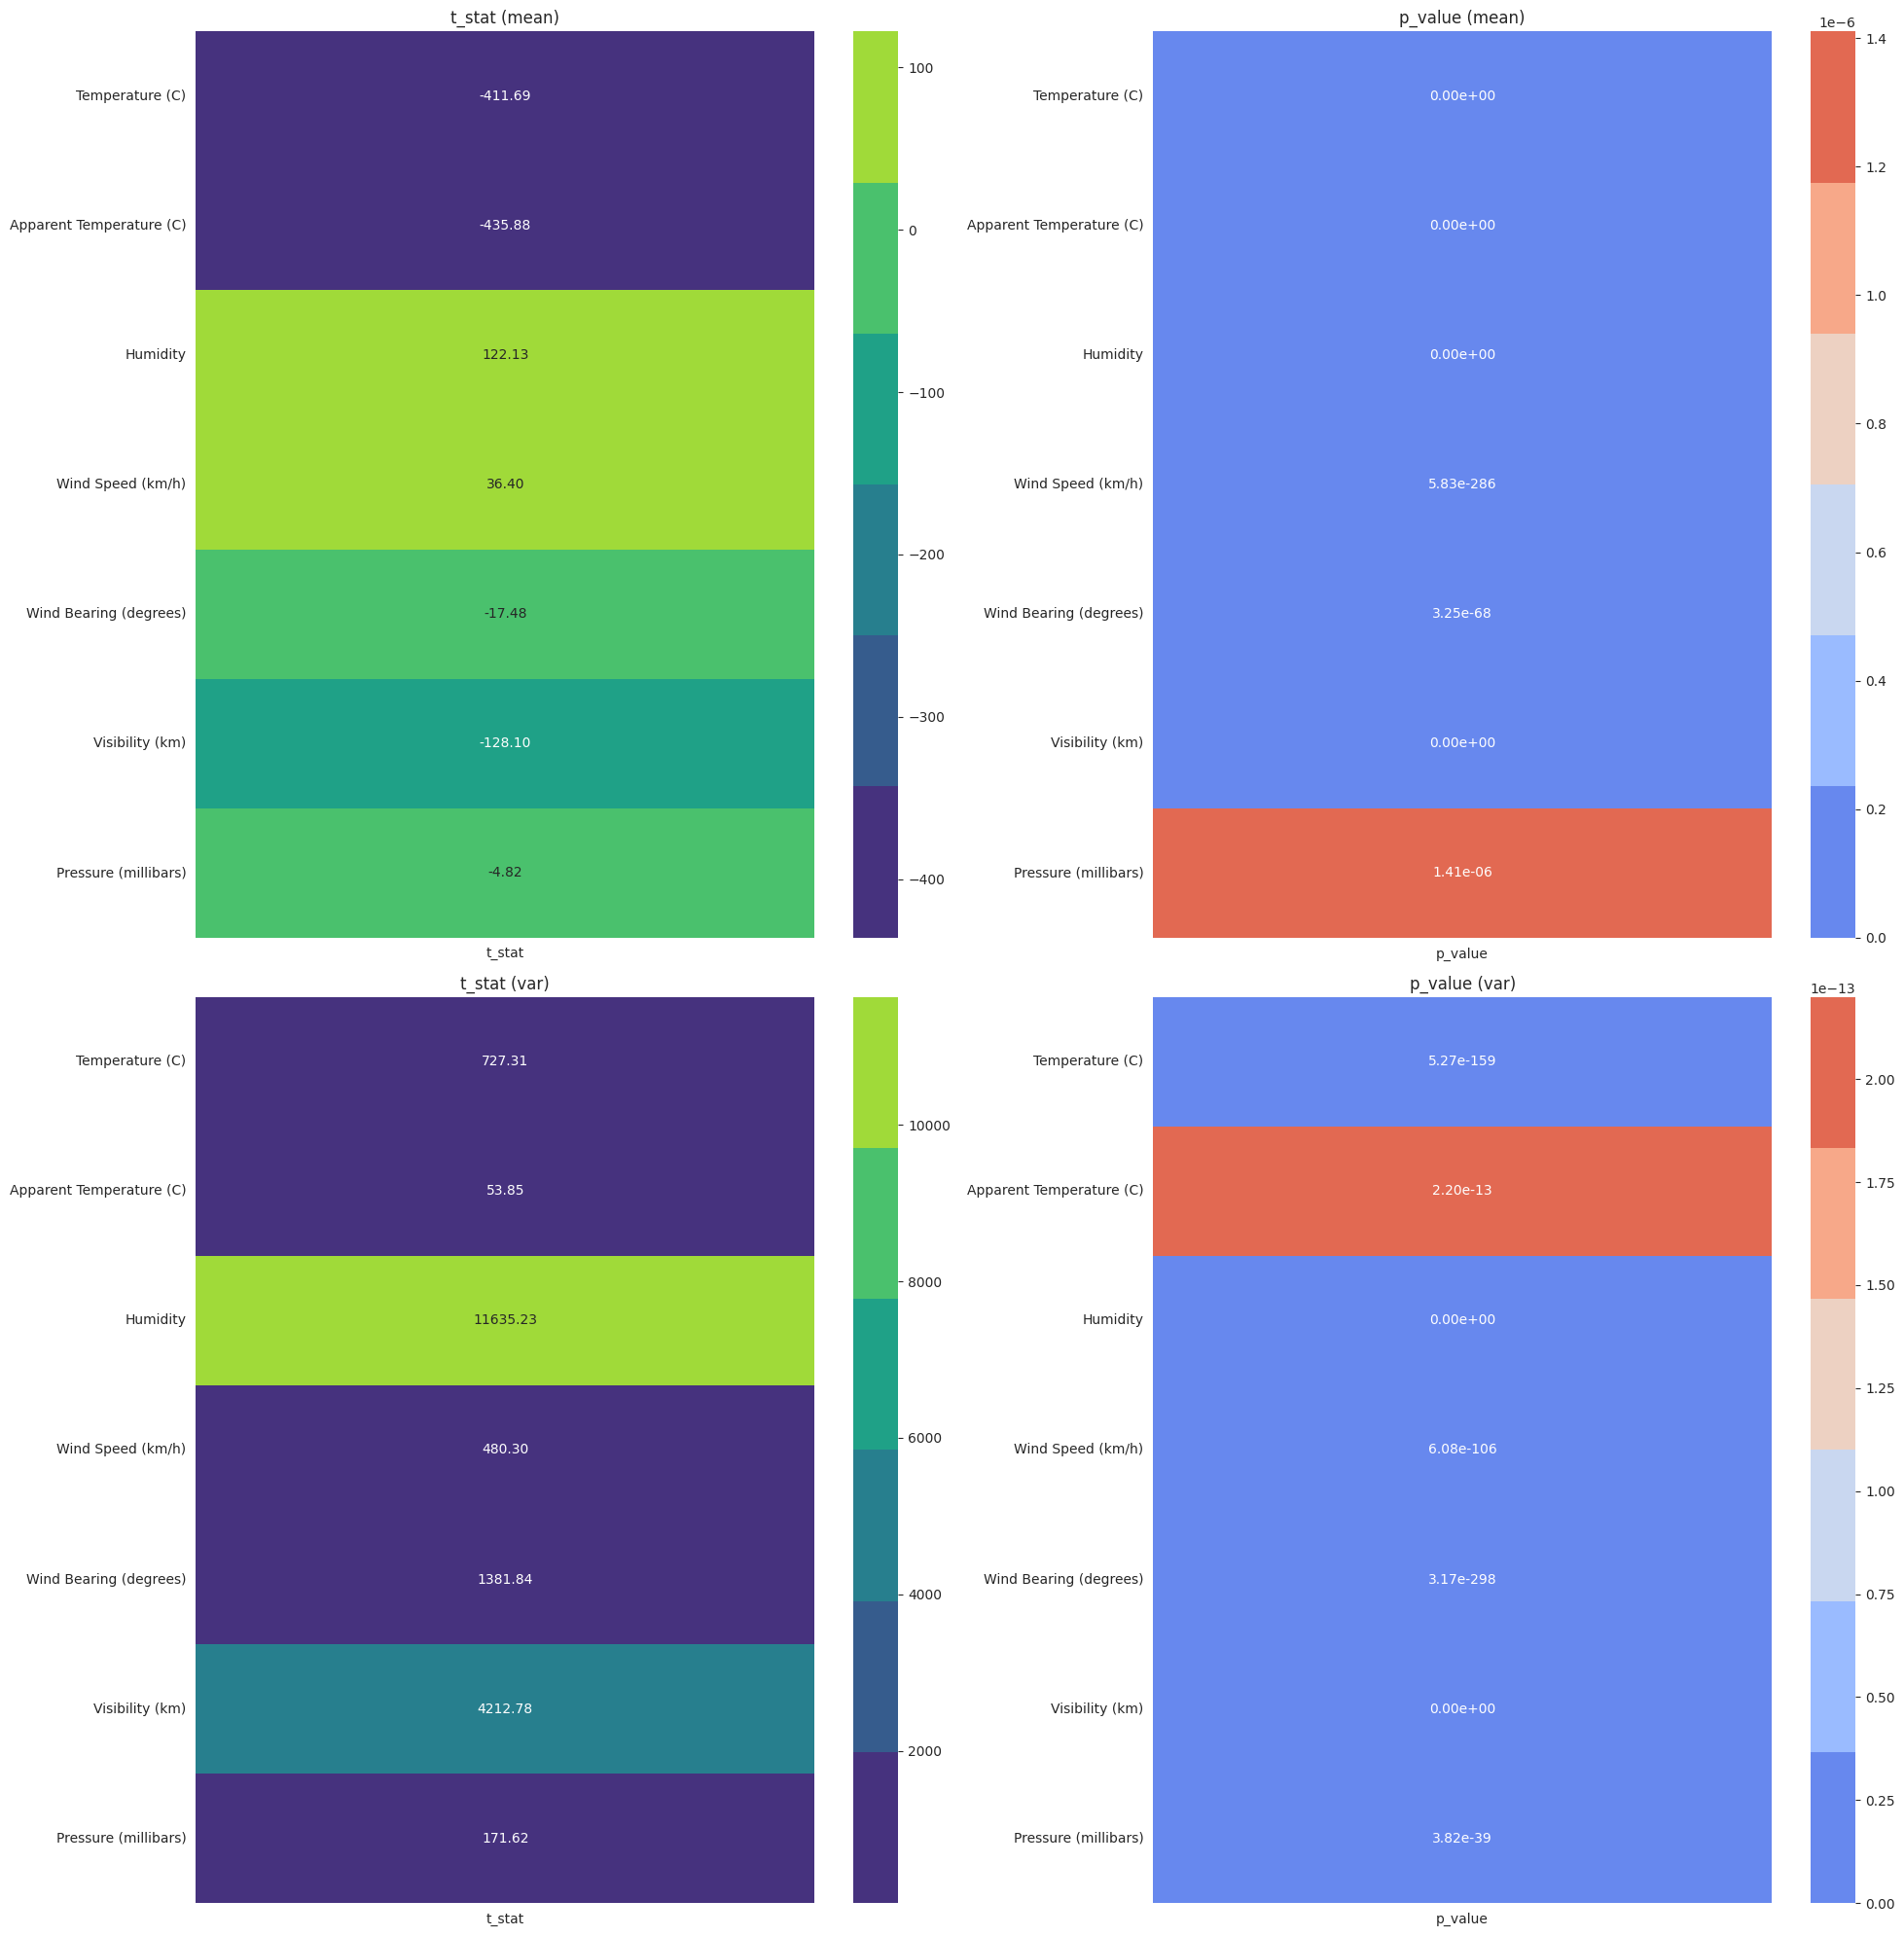

In [258]:
fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(20, 20))

# Mapy kolorów dla lepszego rozróżnienia
cmap_t_stat = sns.color_palette("viridis")
cmap_p_val = sns.color_palette("coolwarm")

sns.heatmap(df_mean[['t_stat']], cmap=cmap_t_stat, ax=axs[0, 0], annot=True, fmt=".2f")
sns.heatmap(df_mean[['p_value']], cmap=cmap_p_val, ax=axs[0, 1], annot=True, fmt=".2e")
sns.heatmap(df_var[['t_stat']], cmap=cmap_t_stat, ax=axs[1, 0], annot=True, fmt=".2f")
sns.heatmap(df_var[['p_value']], cmap=cmap_p_val, ax=axs[1, 1], annot=True, fmt=".2e")

axs[0, 0].set_title('t_stat (mean)')
axs[0, 1].set_title('p_value (mean)')
axs[1, 0].set_title('t_stat (var)')
axs[1, 1].set_title('p_value (var)')

plt.tight_layout()
plt.show()

#### TEST NORMALNOŚCI 

In [259]:
anderson_stat_t=[]
anderson_critical_value_t=[]
for column in COLUMNS_TO_TEST:
    sample = data[column]
    anderson_stat = stats.anderson(sample).statistic
    anderson_stat_t.append(anderson_stat)
    anderson_critical_value = stats.anderson(sample).critical_values[2]
    anderson_critical_value_t.append(anderson_critical_value)
    if anderson_stat > anderson_critical_value:
        print(
            f"Odrzucamy H0 dla kolumny {column}. Rozkład danych nie jest normalny (metoda Anderson-Darling).")
    else:
        print(
            f"Nie ma podstaw do odrzucenia H0 dla kolumny {column}. Rozkład danych jest normalny (metoda Anderson-Darl")

Odrzucamy H0 dla kolumny Temperature (C). Rozkład danych nie jest normalny (metoda Anderson-Darling).
Odrzucamy H0 dla kolumny Apparent Temperature (C). Rozkład danych nie jest normalny (metoda Anderson-Darling).
Odrzucamy H0 dla kolumny Humidity. Rozkład danych nie jest normalny (metoda Anderson-Darling).
Odrzucamy H0 dla kolumny Wind Speed (km/h). Rozkład danych nie jest normalny (metoda Anderson-Darling).
Odrzucamy H0 dla kolumny Wind Bearing (degrees). Rozkład danych nie jest normalny (metoda Anderson-Darling).
Odrzucamy H0 dla kolumny Visibility (km). Rozkład danych nie jest normalny (metoda Anderson-Darling).
Odrzucamy H0 dla kolumny Pressure (millibars). Rozkład danych nie jest normalny (metoda Anderson-Darling).


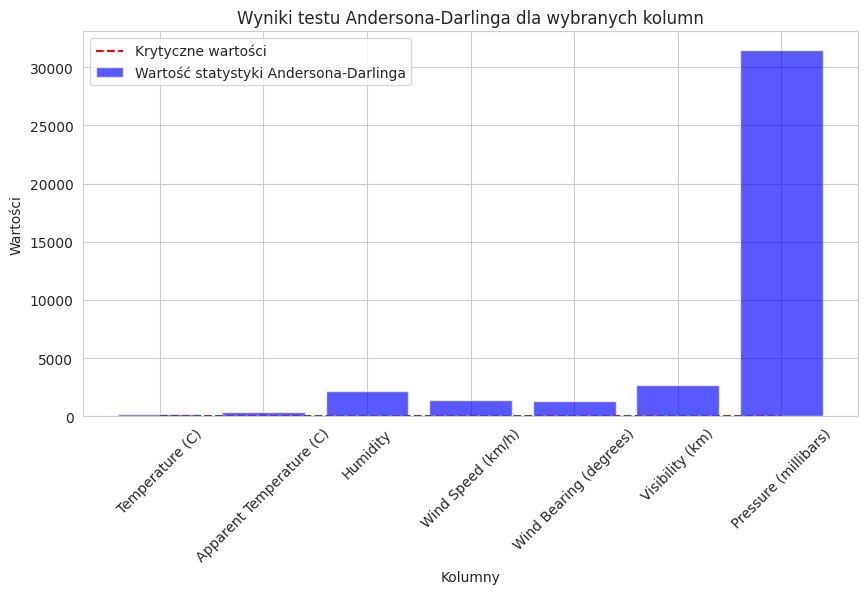

In [260]:
plt.figure(figsize=(10,5))
plt.bar(COLUMNS_TO_TEST, anderson_stat_t, color = 'b', alpha=0.65, label='Wartość statystyki Andersona-Darlinga')
plt.plot(COLUMNS_TO_TEST, anderson_critical_value_t, 'r--', label='Krytyczne wartości')
plt.legend()
plt.title('Wyniki testu Andersona-Darlinga dla wybranych kolumn')
plt.xlabel('Kolumny')
plt.ylabel('Wartości')
plt.xticks(rotation=45)
plt.show()

## Interpretacja wyników testu Andersona-Darlinga
Wyniki testu Andersona-Darlinga dla wybranych kolumn wskazują, że rozkład danych pogodowych nie jest normalny. Wartości statystyki Andersona-Darlinga są większe niż krytyczne wartości dla każdej z kolumn, co sugeruje, że rozkład danych pogodowych nie jest normalny.


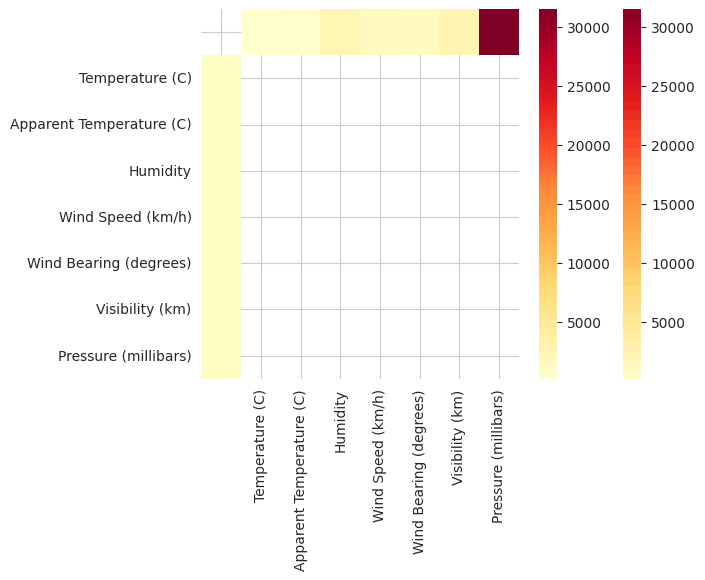

In [261]:
x = np.zeros((len(COLUMNS_TO_TEST) + 1, len(COLUMNS_TO_TEST) + 1))
x[0,1:]=anderson_stat_t
x[1:,0]=anderson_critical_value_t
x[1:,1:]=np.nan
x[0,0]=np.nan
df = pd.DataFrame(x, columns=[''] + COLUMNS_TO_TEST, index=[''] + COLUMNS_TO_TEST)

positives = sns.color_palette("YlOrRd",40)
small_positives = plt.get_cmap('YlOrRd',6000)

mask_first_column = np.zeros_like(df, dtype=bool)
mask_first_column[0, :] = True

mask_first_row = np.zeros_like(df, dtype=bool)
mask_first_row[:, 0] = True

# Plot the heatmap with masks
sns.heatmap(data=df, mask=mask_first_column, cmap=positives, vmin=202, vmax=31504) #anderson_critical_value_t
sns.heatmap(data=df, mask=mask_first_row, cmap=small_positives, vmin=202, vmax=31504)

plt.show() 
